# 2D Computer Vision - Abgabe 1

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import io



# 1. Aufgabe

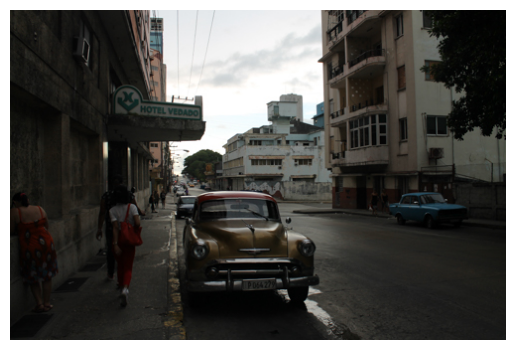

Datentyp des Bildes: <class 'numpy.ndarray'>
Ausgabe des Numpy Arrays: [[[34 29 25]
  [28 28 20]
  [25 24 20]
  ...
  [ 3  3  3]
  [ 3  3  3]
  [ 4  4  4]]

 [[33 30 25]
  [24 25 17]
  [22 23 18]
  ...
  [ 3  3  3]
  [ 2  2  2]
  [ 3  3  3]]

 [[33 30 25]
  [26 26 18]
  [23 22 18]
  ...
  [ 2  4  3]
  [ 2  4  3]
  [ 2  4  3]]

 ...

 [[ 8  8  8]
  [ 8  8  8]
  [ 9  9  9]
  ...
  [27 27 27]
  [24 24 24]
  [24 24 24]]

 [[16 16 14]
  [16 16 14]
  [16 16 16]
  ...
  [25 27 26]
  [26 26 26]
  [28 28 28]]

 [[22 22 20]
  [22 22 20]
  [22 22 20]
  ...
  [26 28 25]
  [25 27 26]
  [25 27 26]]]


In [29]:
image = io.imread('bild01.jpg')
plt.imshow(image)
plt.axis('off') 
plt.show()

print(f"Datentyp des Bildes: {type(image)}")
print(f"Ausgabe des Numpy Arrays: {image}")


3. Wie ist ein Numpy Array aufgebaut? 
- Array in Array, die jeweils 3 Werte beinhalten
- die Werte stehen für RGB und legen den Wert des Pixels fest

4. Farbkanäle

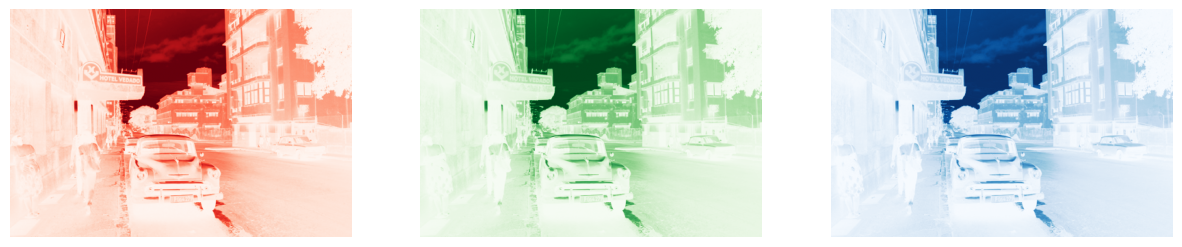

In [30]:
red, green, blue = cv2.split(image)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(red, cmap="Reds")
axs[1].imshow(green, cmap="Greens")
axs[2].imshow(blue, cmap="Blues")

for ax in axs:
    ax.axis("off")

plt.show()

5. Horizontale Spiegelung

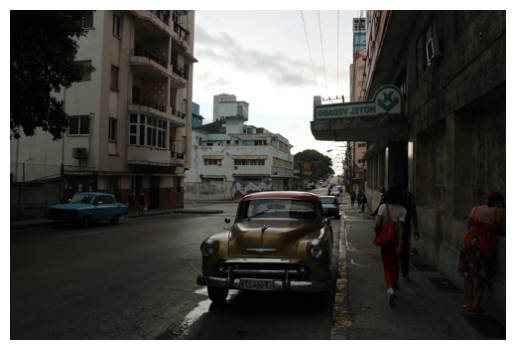

In [31]:
horizontal_img = [list(reversed(row)) for row in image]
plt.imshow(horizontal_img)
plt.axis('off') 
plt.show()



# 2. Aufgabe
2. Bilder einlesen

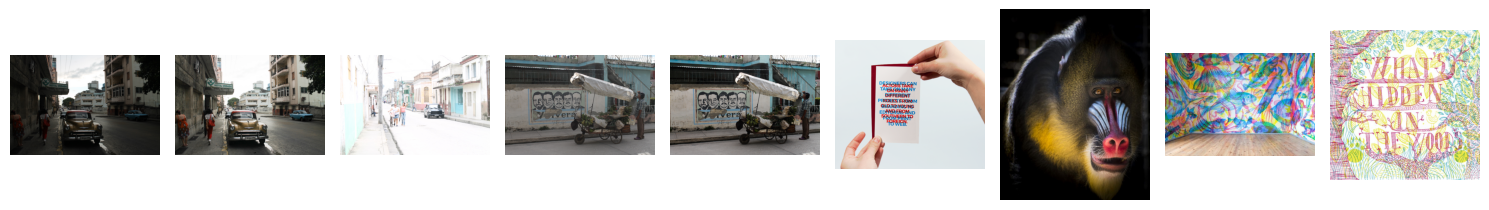

In [56]:
images = []
for file in os.listdir('.'):
    if file.endswith(('.jpg', '.png')):
        img = io.imread(file)
        images.append(img)

fig, axs = plt.subplots(1, len(images), figsize=(15, 5))

for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

3. Histogramm für ein Bild berechnen

In [57]:
#Implementierung mit cv2

test_image = images[7]

gray_img = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

#plt.imshow(gray_img, cmap='gray')
#plt.axis('off')
#plt.show()

histogram = cv2.calcHist([gray_img],[0],None,[256],[0,256])

#plt.bar(range(256), histogram.flatten())
#plt.title("Histogramm")
#plt.xlabel("Intensitätswert i")
#plt.ylabel("Pixelanzahl h(i)")
#plt.show()

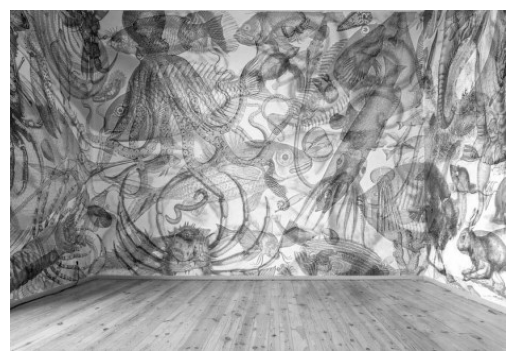

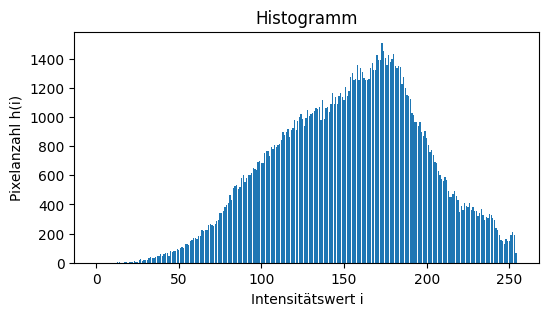

In [58]:
#Eigene Implementierung

def gray_converter(image):
     gray_image = 0.2989 * image[:, :, 2] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 0]
     return gray_image

def computeHisto(gray_image):
     hist = np.zeros(256, dtype=int)
     for pixel in gray_image.flatten():
        hist[int(pixel)] += 1
     return hist

converted_img = gray_converter(test_image)
histo = computeHisto(converted_img)

plt.imshow(converted_img, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 3))
plt.bar(range(256), histo.flatten())
plt.title("Histogramm")
plt.xlabel("Intensitätswert i")
plt.ylabel("Pixelanzahl h(i)")
plt.show()

4. Histogramm für alle Bilder

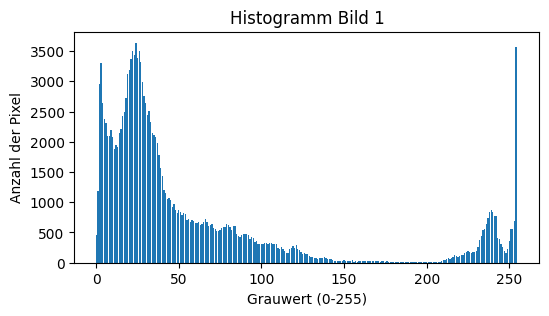

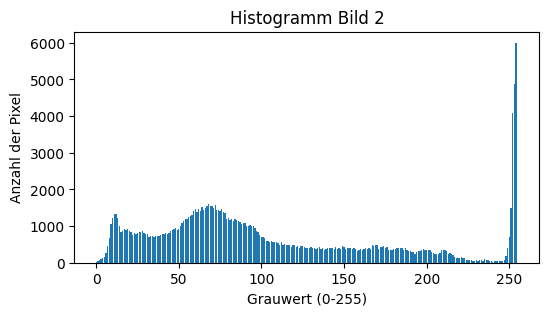

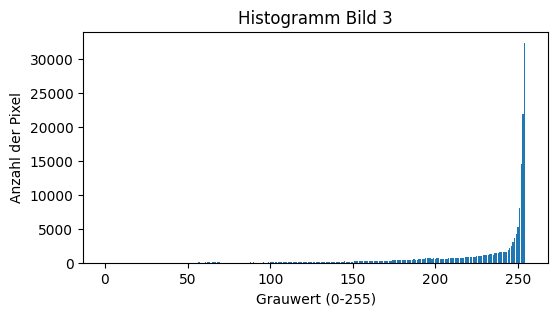

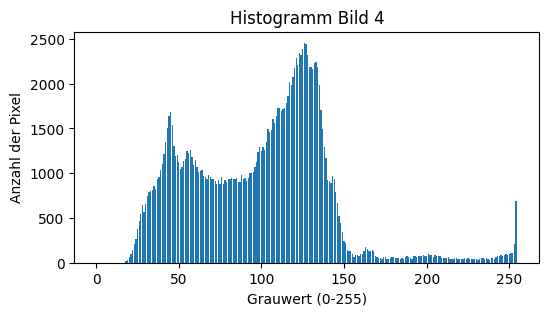

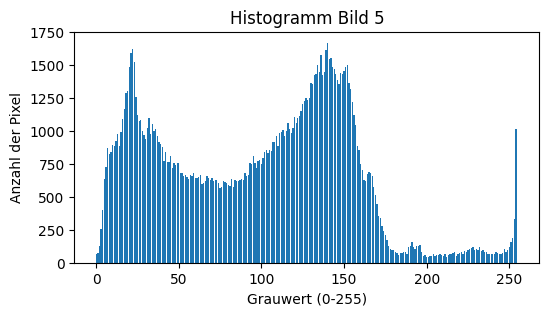

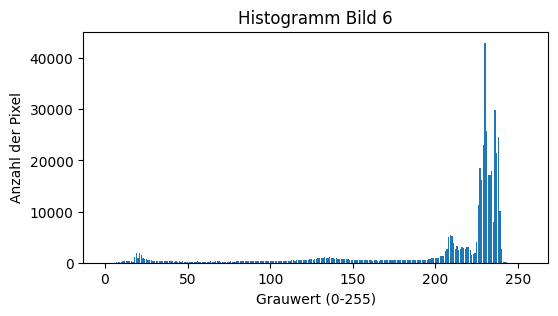

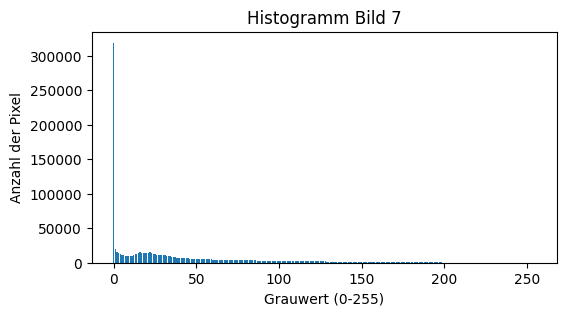

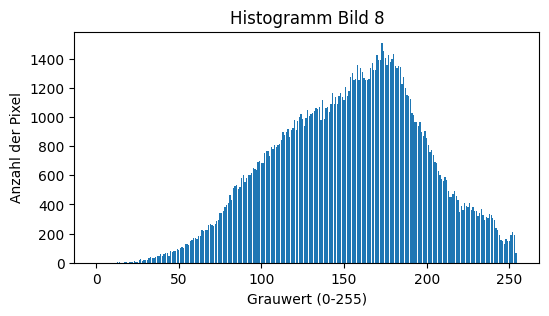

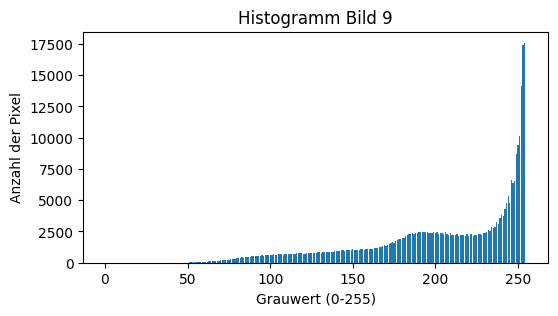

In [59]:
for i, img in enumerate(images):
    gray_image =  gray_converter(img)
    histo = computeHisto(gray_image)
    
    plt.figure(figsize=(6, 3))
    plt.bar(range(256), histo)
    plt.title(f"Histogramm Bild {i+1}")
    plt.xlabel("Grauwert (0-255)")
    plt.ylabel("Anzahl der Pixel")
    
    plt.show()


a) Welche Aufnahmefehler sind in 01 und 03 zu erkennen? Woran ist dies im Histogramm erkennbar?

Bild 1:

b) Bild01 ist das aufgenommene Bild. Bild02 wurde nachbearbeitet. Die Helligkeit wurde erhöht. Woran ist dies im Histogramm erkennbar? Welche Daten gehen dabei verloren?
c) Bild04 ist das aufgenommene Bild. Bild05 wurde einem Bearbeitungsschritt unterzogen. Was wurde in Bild05 verändert? Woran kann man dies in seinem Histogramm erkennen?